# Multilayer neural networks

## Lecture 10

### GRA 4160
### Predictive modelling with machine learning

#### Lecturer: Vegard H. Larsen

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

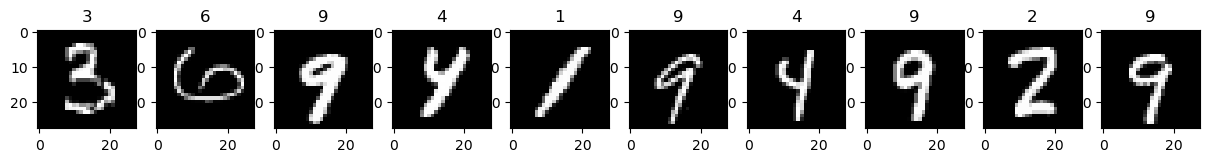

In [2]:


# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Display 10 random example images
num_images = 10
random_indices = np.random.choice(len(train_images), num_images)
plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images, i+1)
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(train_labels[idx])

plt.show()

In [3]:
# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(np.shape(x_train))

(60000, 28, 28)


In [4]:
# Let´ reshape the data

# This line reshapes the training dataset x_train from its original shape of (60000, 28, 28) to a new shape of (60000, 784).
# The original shape represents 60,000 images, each of size 28x28 pixels.
# The new shape flattens each image into a one-dimensional array of 784 elements (28 * 28).
# This is done because the neural network expects a one-dimensional input for each sample.
x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype("float32") / 255

# This line first converts the data type of x_train to float32.
# Then, it divides each element by 255.
# The purpose of this operation is to normalize the pixel values, which originally range from 0 (black) to 255 (white), to a range between 0 and 1.
# Normalizing the input data usually helps the neural network learn more effectively and converge faster.
x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype("float32") / 255

In [5]:
# Let's look at the output data

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
# Convert the labels to categorical one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [8]:
# We then create a multilayer neural network with two hidden layers.
# The first hidden layer has 128 neurons and a ReLU activation function, while the second hidden layer has 64 neurons and a ReLU activation function.
# The output layer has 10 neurons with a softmax activation function, corresponding to the 10 possible digit classes (0-9).

model = models.Sequential()
model.add(layers.Dense(128, activation="relu", input_shape=(28 * 28,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [9]:
# Compile the model
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy:", test_acc)

Epoch 1/10
 53/375 [===>..........................] - ETA: 0s - loss: 2.1687 - accuracy: 0.2667 

2024-03-21 09:02:34.879389: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


375/375 [==============================] - 1s 1ms/step - loss: 1.4630 - accuracy: 0.6036 - val_loss: 0.7924 - val_accuracy: 0.8117
Epoch 2/10
375/375 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.8372 - val_loss: 0.4815 - val_accuracy: 0.8763
Epoch 3/10
375/375 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.8776 - val_loss: 0.3929 - val_accuracy: 0.8948
Epoch 4/10
375/375 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8925 - val_loss: 0.3507 - val_accuracy: 0.9039
Epoch 5/10
375/375 [==============================] - 0s 1ms/step - loss: 0.3561 - accuracy: 0.9004 - val_loss: 0.3255 - val_accuracy: 0.9093
Epoch 6/10
375/375 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.9064 - val_loss: 0.3072 - val_accuracy: 0.9130
Epoch 7/10
375/375 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.9113 - val_loss: 0.2948 - val_accuracy: 0.9146
Epoch 8/10
375/37

## Adaptive moment estimation (adam) optimizer

Adam is an adaptive optimization algorithm that combines the ideas of two other optimization algorithms: Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp).
It computes adaptive learning rates for each weight based on the first moment (mean) and the second moment (variance) of the gradients.

Adam maintains exponential moving averages of the gradients and the squared gradients, denoted by $m_t$ and $v_t$, respectively.
The weight update in Adam can be described as:

$$w_{t+1} = w_{t} - \frac{\nu \cdot m_t}{\sqrt(v_t) + \epsilon}$$

where $w_t$ represents the weights at time $t$, the learning rate, $\nu$, is a hyperparameter that controls the initial step size of the updates, $m_t$ and $v_t$ are the exponential moving averages of the gradients and squared gradients, and $\epsilon$ is a small constant to prevent division by zero.

Adam automatically adjusts the learning rate for each weight during training, making it more robust and effective in handling complex optimization landscapes.
It usually converges faster than SGD and is less sensitive to the initial learning rate.

In practice, Adam is often the preferred choice due to its adaptive nature and faster convergence.
However, it's essential to experiment with different optimizers and hyperparameters to find the best configuration for a specific problem.

In [10]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy:", test_acc)

Epoch 1/10
375/375 [==============================] - 1s 1ms/step - loss: 0.2134 - accuracy: 0.9379 - val_loss: 0.1564 - val_accuracy: 0.9532
Epoch 2/10
375/375 [==============================] - 0s 1ms/step - loss: 0.1242 - accuracy: 0.9637 - val_loss: 0.1140 - val_accuracy: 0.9663
Epoch 3/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0857 - accuracy: 0.9744 - val_loss: 0.1003 - val_accuracy: 0.9684
Epoch 4/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0644 - accuracy: 0.9811 - val_loss: 0.0994 - val_accuracy: 0.9703
Epoch 5/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0912 - val_accuracy: 0.9743
Epoch 6/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0378 - accuracy: 0.9891 - val_loss: 0.0935 - val_accuracy: 0.9730
Epoch 7/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0321 - accuracy: 0.9905 - val_loss: 0.0936 - val_accuracy: 0.9729
Epoch 